<a href="https://colab.research.google.com/github/DAFFAYORIKO/Datamining_Kelompok_O/blob/main/DATMIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok O:

1. Fadhilah Daffa Yoriko - 2006571116
2. Muhammad Fabian Alkautsar - 2006482653
3. Tesalonicca Talitha - 1906377826
4. Nurul Annisa - 1906377864

permasalahan :
1. Kualitas data yang dimiliki perusahaan

Kualitas data yang dimiliki oleh perusahaan cukup berantakan dan memiliki banyak kekurangan informasi berupa missing value.

pada data juga terdapat banyak kolom yang kosong.

In [88]:
import warnings
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
plt.style.use('bmh'); sns.set()

INPUT DATA

In [63]:
try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')    
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

MENGGABUNGKAN DATA

In [64]:
df_semua = pd.concat([dfJ, dfD, dfB, dfT, dfX], ignore_index=True)
df_semua.sample(25)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
2038,06-12-2021,200.0,170.0,2.0,1.0,0.0,0.0,Parung,Lainnya,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041,6-12-2021,100,66.0,3.0,2.0,NaN,NaN,Sukmajaya,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MENGHAPUS KOLOM YANG KOSONG

In [65]:
df_semua.drop(dfJ.iloc[:,14:26], axis=1, inplace= True)
df_semua.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."


MENGHAPUS BARIS YANG SETIAP KOLOMNYA BERISI MISSING VALUE

In [66]:
df_semua.dropna(how='all',inplace=True)

In [67]:
print(df_semua.isnull().sum())

created_at      1
LT              0
LB              2
KT              2
KM              3
garasi        332
carport       115
lokasi          2
sertifikat      7
listrik        37
hadap         451
harga           2
URL             2
deskripsi      11
dtype: int64


In [68]:
df_semua.shape

(665, 14)

In [69]:
df_semua.drop(labels=['garasi','hadap'],axis=1, inplace=True)

In [70]:
df_semua.head()

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,Jakarta Pusat,SHM,2200.0,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,Jakarta Pusat,SHM,2200.0,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."


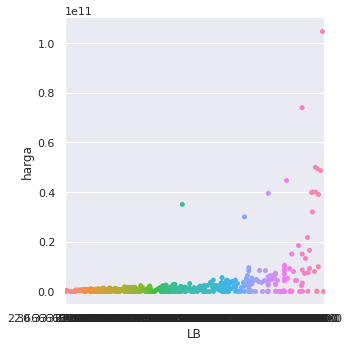

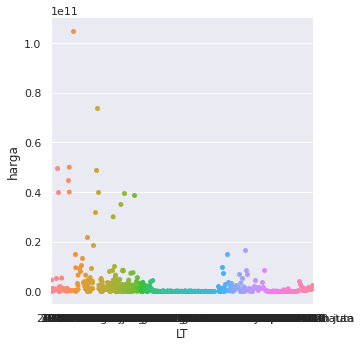

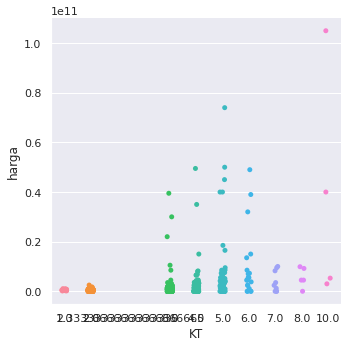

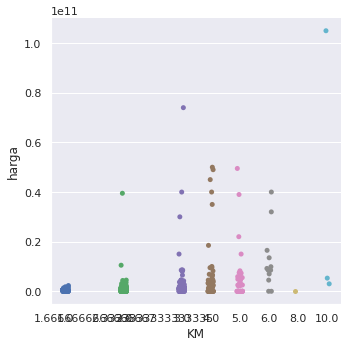

In [81]:
p= sns.catplot(x="LB", y="harga", data=df_semua)
p= sns.catplot(x="LT", y="harga", data=df_semua)
p= sns.catplot(x="KT", y="harga", data=df_semua)
p= sns.catplot(x="KM", y="harga", data=df_semua)

In [71]:
df_semua.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 0 to 3255
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  664 non-null    object 
 1   LT          665 non-null    object 
 2   LB          663 non-null    float64
 3   KT          663 non-null    float64
 4   KM          662 non-null    float64
 5   carport     550 non-null    float64
 6   lokasi      663 non-null    object 
 7   sertifikat  658 non-null    object 
 8   listrik     628 non-null    float64
 9   harga       663 non-null    float64
 10  URL         663 non-null    object 
 11  deskripsi   654 non-null    object 
dtypes: float64(6), object(6)
memory usage: 67.5+ KB


In [72]:
print(df_semua.isnull().sum())

created_at      1
LT              0
LB              2
KT              2
KM              3
carport       115
lokasi          2
sertifikat      7
listrik        37
harga           2
URL             2
deskripsi      11
dtype: int64


In [82]:
df_semua['LB'].interpolate(method='linear', direction = 'both', inplace=True)
df_semua['KT'].interpolate(method='linear', direction = 'both', inplace=True)
df_semua['KM'].interpolate(method='linear', direction = 'both', inplace=True)
df_semua['listrik'].interpolate(method='linear', direction = 'both', inplace=True)
df_semua['carport'].fillna(df_semua['carport'].mean(), inplace=True)


In [90]:
df_semua['sertifikat'] = df_semua['sertifikat'].fillna(df_semua['sertifikat'].mode()[0])
df_semua['deskripsi'] = df_semua['deskripsi'].fillna(df_semua['deskripsi'].mode()[0])


In [91]:
print(df_semua.isnull().sum())

created_at    1
LT            0
LB            0
KT            0
KM            0
carport       0
lokasi        2
sertifikat    0
listrik       0
harga         2
URL           2
deskripsi     0
dtype: int64


In [96]:
df_semua.dropna(inplace=True)

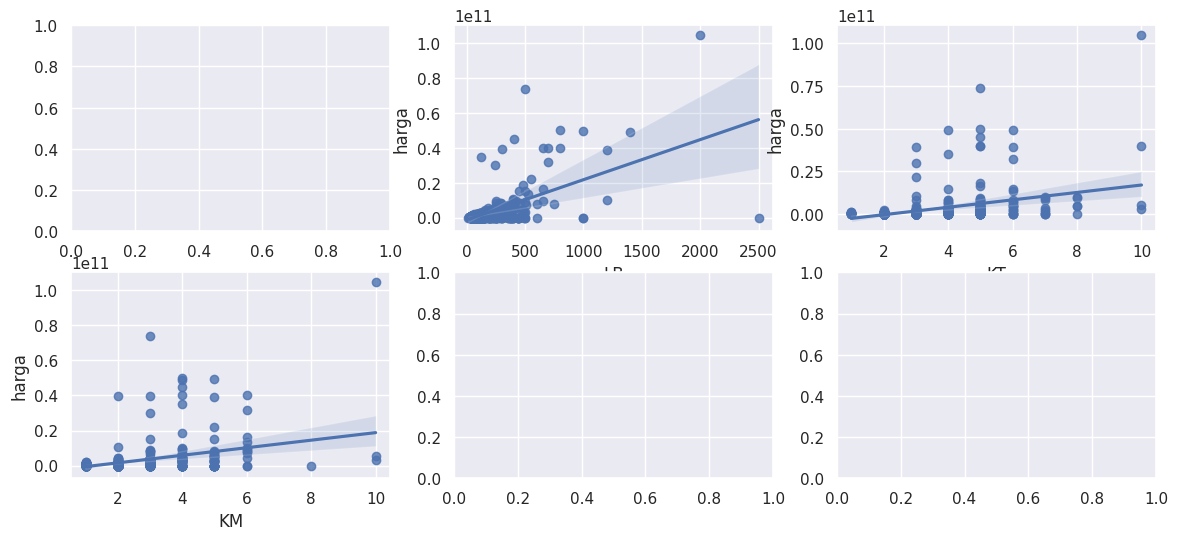

In [103]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(14, 6), dpi=100)
sns.regplot(data=df_semua, x="LB", y="harga", ax=axs[0][1])
sns.regplot(data=df_semua, x="KT", y="harga", ax=axs[0][2])
sns.regplot(data=df_semua, x="KM", y="harga", ax=axs[1][0])

2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.

kita menyarankan untuk DE/DBA agar tidak memasukkan data yang kosong

In [98]:
df_semua.groupby('lokasi').agg({'harga': ['median', 'sum']}).sort_values(('harga',    'sum'), ascending=False)

harga              
                                  median           sum
lokasi                                                
Jakarta Selatan             9.350000e+09  4.029300e+11
Jakarta Pusat               1.200000e+09  3.087980e+11
Jakarta Utara               4.500000e+09  2.037064e+11
Jakarta Barat               3.099000e+09  1.132831e+11
Babakan Madang              1.700000e+09  9.384710e+10
...                                  ...           ...
MAUK, TANGERANG             4.500000e+02  4.500000e+02
LEGOK, TANGERANG            3.960000e+02  3.960000e+02
CITRA MAJA RAYA, TANGERANG  2.500000e+02  2.500000e+02
RAWAKALONG, TANGERANG       2.210000e+02  2.210000e+02
SEPATAN, TANGERANG          1.480000e+02  1.480000e+02

[86 rows x 2 columns]

3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?

Kami merekomendasikan untuk perusahaan membuka cabang pada daerah jakarta selatan

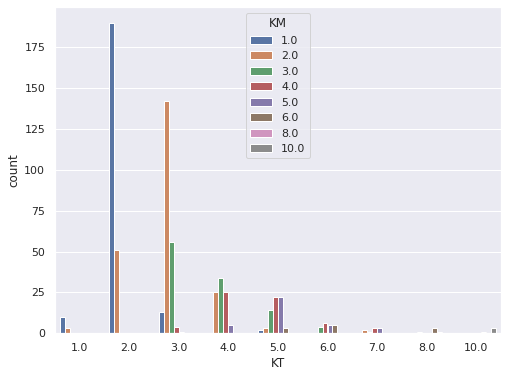

In [100]:
plt.figure(figsize=(8,6))
p = sns.countplot(x="KT", hue="KM", data=df_semua)

5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?

